In [46]:
import torch
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F

In [47]:
torch.manual_seed(4)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## test Activation Function

In [48]:
x = torch.linspace(-5, 5, 200) # -5 ~ 5를 200개로 자르기
x = Variable(x)
x_np = x.data.numpy()

In [49]:
y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()
# f(x)=1/beta∗log(1+exp(beta∗xi))

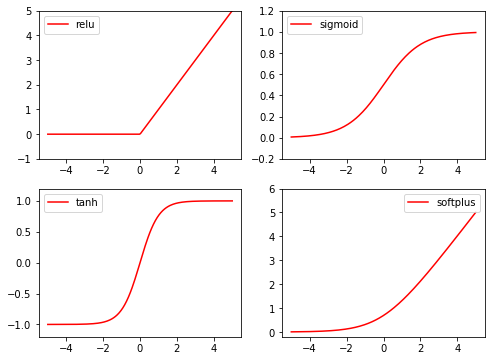

In [50]:
plt.figure(1, figsize=(8,6))

plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1,5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')
plt.show()


## Make Data

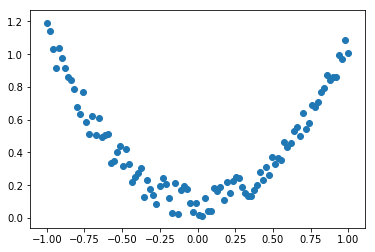

In [51]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size())
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()


## Define NonLinear Model

In [52]:
hidden = nn.Linear(1, 20, bias=True)
activation = nn.ReLU()
#activation = nn.Sigmoid()
optput = nn.Linear(20, 1, bias=True)

nn.Linear Parameters :  nn.Linear(in_features, out_features, bias) 
1. in_features – size of each input sample 
2. out_features – size of each output sample  
3. bias – If set to False, the layer will not learn an additive bias. Default: True

In [53]:
net = nn.Sequential(hidden, activation, optput)
# 모듈 합쳐주기


## Define Optimizer and Loss Function

In [54]:
#optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
optimizer = torch.optim.Adam(net.parameters(), lr=0.1)
loss_func = torch.nn.MSELoss()

Adam : https://arxiv.org/pdf/1412.6980.pdf


## Train

In [55]:
x.size()

torch.Size([100, 1])

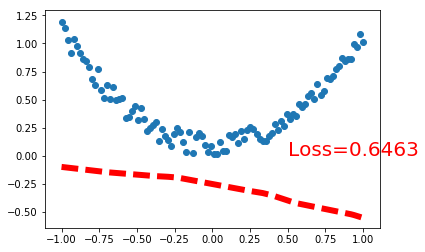

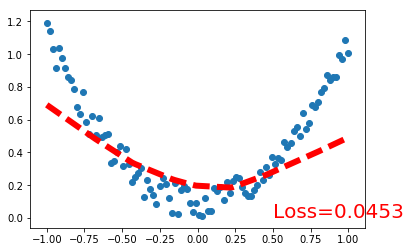

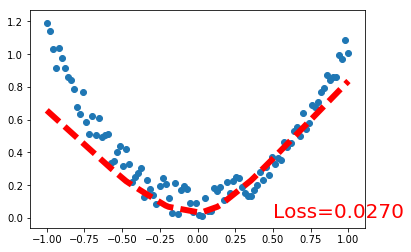

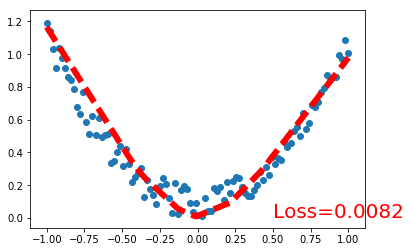

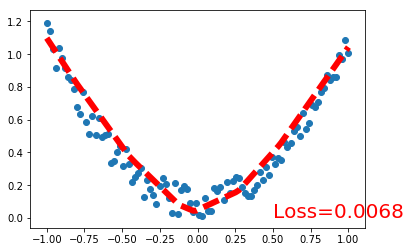

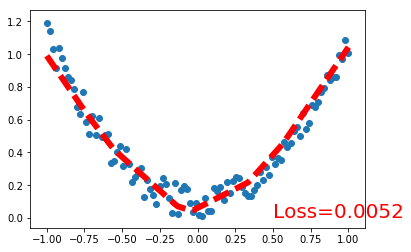

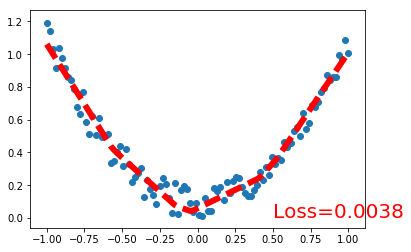

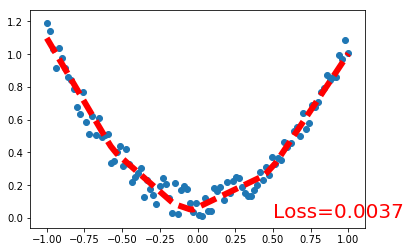

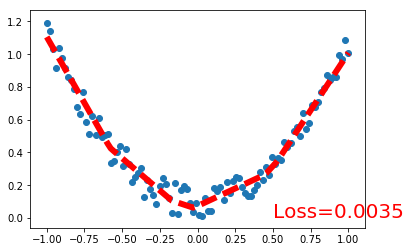

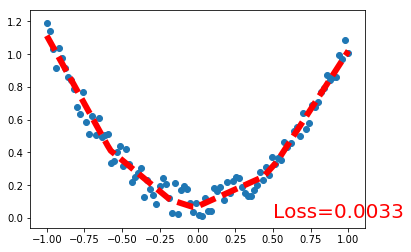

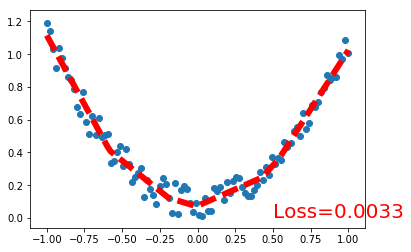

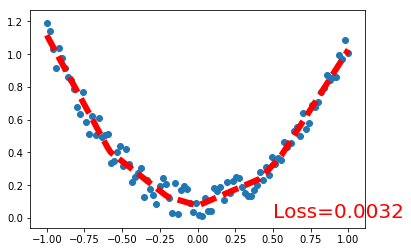

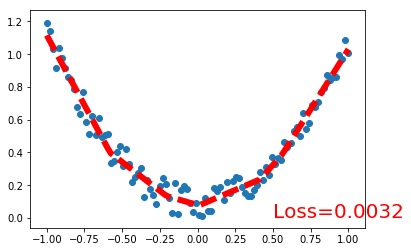

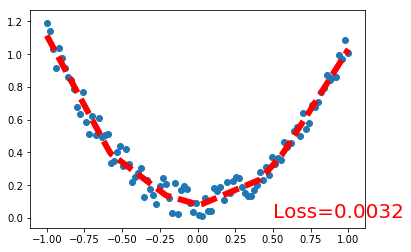

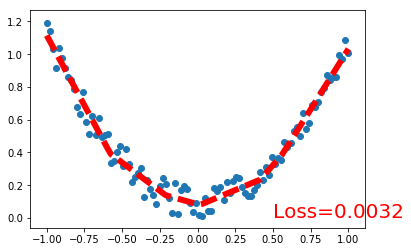

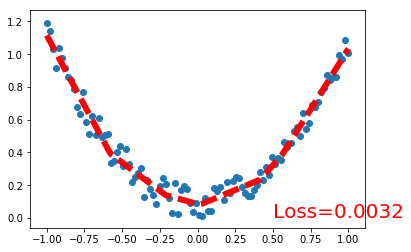

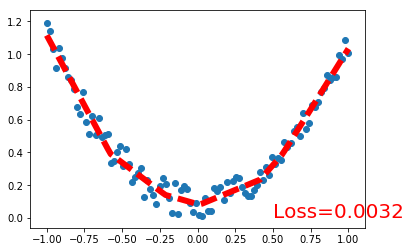

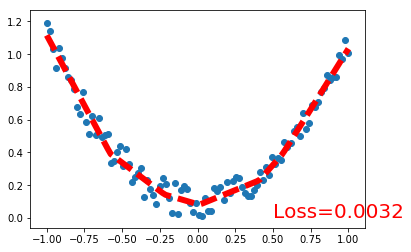

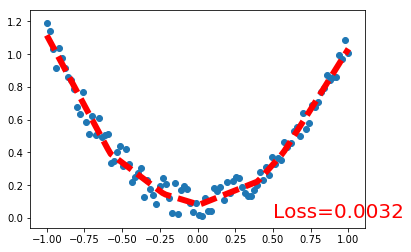

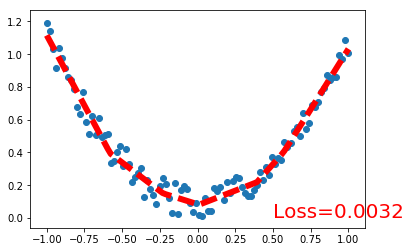

In [56]:
for t in range(200):
    prediction = net(x)
    
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 10  == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r--', lw=6)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size':20, 'color':'red'})
        plt.show()
        plt.pause(0.2)
        
plt.ioff()


## save and Load

In [57]:
torch.save(net.state_dict(), 'nonlinear.pkl')
net.state_dict()

OrderedDict([('0.weight', 
               1.9774
               0.1974
              -0.7558
              -0.2110
               0.2751
              -0.0239
              -1.1055
              -0.1753
              -0.0356
              -1.6594
              -0.3164
              -0.6396
               0.8799
               1.5780
              -0.1364
              -0.3687
              -0.2956
               0.7525
              -0.1664
               0.3963
              [torch.FloatTensor of size 20x1]), ('0.bias', 
               0.4619
              -0.9415
              -0.4359
               0.4426
              -0.3377
              -0.8864
              -0.6398
               0.1295
               0.0263
               0.0168
              -0.1071
              -0.3725
              -0.4983
              -0.6196
              -0.8307
              -0.8400
              -0.8915
              -0.9107
              -0.5091
              -0.8096
              [torch.FloatTensor

In [58]:
net.load_state_dict(torch.load('nonlinear.pkl'))
net.state_dict()

OrderedDict([('0.weight', 
               1.9774
               0.1974
              -0.7558
              -0.2110
               0.2751
              -0.0239
              -1.1055
              -0.1753
              -0.0356
              -1.6594
              -0.3164
              -0.6396
               0.8799
               1.5780
              -0.1364
              -0.3687
              -0.2956
               0.7525
              -0.1664
               0.3963
              [torch.FloatTensor of size 20x1]), ('0.bias', 
               0.4619
              -0.9415
              -0.4359
               0.4426
              -0.3377
              -0.8864
              -0.6398
               0.1295
               0.0263
               0.0168
              -0.1071
              -0.3725
              -0.4983
              -0.6196
              -0.8307
              -0.8400
              -0.8915
              -0.9107
              -0.5091
              -0.8096
              [torch.FloatTensor


## Entire save and load

In [59]:
torch.save(net,'net.pkl')

In [60]:
net = torch.load('net.pkl')